In [ ]:
# Real Estate Price Prediction
# Develop regression models to predict property selling prices using the UCI Real Estate Valuation dataset.

# 1. Install and import libraries
!pip install numpy pandas matplotlib seaborn scikit-learn openpyxl


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
# Count of NaN values per column
nan_counts = df.isna().sum()

# Count of duplicate rows
duplicate_count = df.duplicated().sum()

print("NaN Values per Column:\n", nan_counts)
print("\nTotal Duplicate Rows:", duplicate_count)

NaN Values per Column:
 TransactionDate          0
HouseAge                 0
DistanceToMRT            0
NumConvenienceStores     0
Latitude                 0
Longitude                0
HousePricePerUnitArea    0
dtype: int64

Total Duplicate Rows: 0


In [4]:
import pandas as pd

# Load dataset (skip the first column 'No')
path = '/content/drive/MyDrive/AI Course/umar/Lecture # 04/Problem # 01/Real estate valuation data set.xlsx'
df = pd.read_excel(path)

# Drop the first column (assumed to be 'No')
df = df.iloc[:, 1:]

# Rename columns: inputs + output
df.columns = [
    'TransactionDate',
    'HouseAge',
    'DistanceToMRT',
    'NumConvenienceStores',
    'Latitude',
    'Longitude',
    'HousePricePerUnitArea'  # Output
]


   TransactionDate  HouseAge  DistanceToMRT  NumConvenienceStores  Latitude  \
0      2012.916667      32.0       84.87882                    10  24.98298   
1      2012.916667      19.5      306.59470                     9  24.98034   
2      2013.583333      13.3      561.98450                     5  24.98746   
3      2013.500000      13.3      561.98450                     5  24.98746   
4      2012.833333       5.0      390.56840                     5  24.97937   

   Longitude  HousePricePerUnitArea  
0  121.54024                   37.9  
1  121.53951                   42.2  
2  121.54391                   47.3  
3  121.54391                   54.8  
4  121.54245                   43.1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionDate        414 non-null    float64
 1   HouseAge               414 non-n

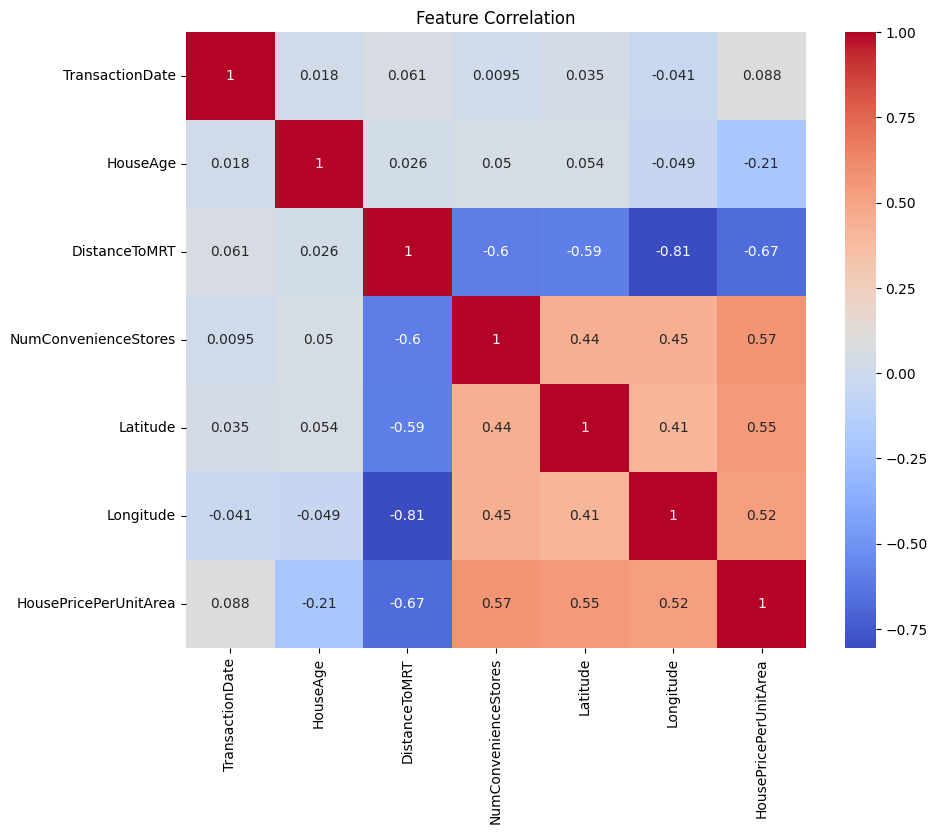

In [5]:
# 3. Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [6]:
# 4. Preprocessing
X = df.drop(['HousePricePerUnitArea'], axis=1)
y = df['HousePricePerUnitArea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 5. Model training and evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

               Model        MSE       RMSE       MAE        R2
0  Linear Regression  53.502252  53.502252  5.305233  0.681078
1      Decision Tree  66.471446  66.471446  5.931325  0.603770
2      Random Forest  32.537136  32.537136  3.963756  0.806049
3  Gradient Boosting  34.155560  34.155560  3.903628  0.796402


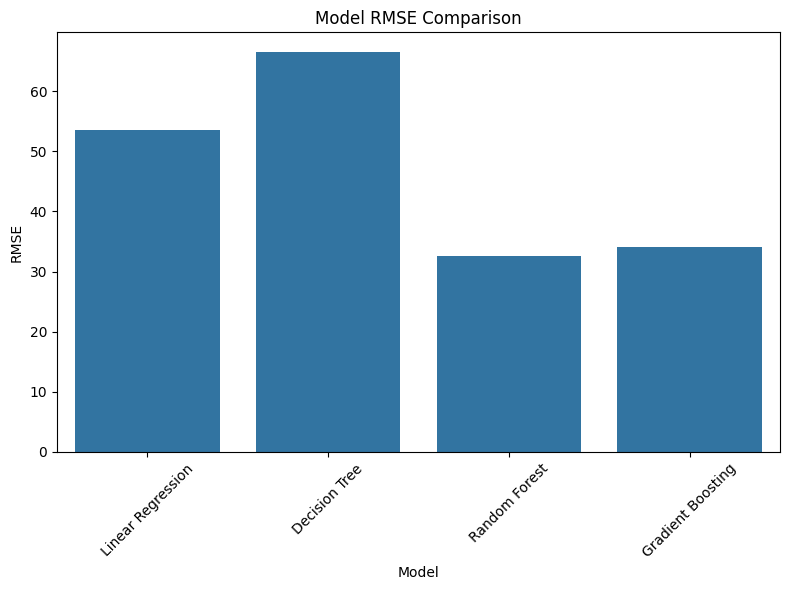

In [9]:
results_df = pd.DataFrame(results)
print(results_df)

# 6. Visualize comparison
plt.figure(figsize=(8,6))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Conclusions
# Based on RMSE, MAE, and R2, compare model performance and select the best-performing regressor for deployment or further tuning.
